In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install nltk

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
df = pd.read_csv('/content/survey_responses.csv')

In [ ]:
df.head()

,ID,Star Rating,Review Source,Love Comment,Hate Comment,Ease of Doing Business,Title
0,18532,4.5,Organic review. This review was written entire...,G2 has helped our customers publicly validate ...,Not a lot to dislike. Be great as G2 becomes ...,7.0,G2 helps market and customer validity
1,67896,4.5,Invitation from G2. This reviewer was offered ...,It showcases a wide range of vendors with unbi...,There aren't enough people open to reviewing p...,6.0,Recommended for gaining visibility in B2B Mark...
2,177131,4.5,Organic review. This review was written entire...,"Great way to build our brand in a new space, b...","So far so good, we are just starting to use ad...",7.0,Credibility
3,179859,5.0,Organic review. This review was written entire...,The end to end service and process has been th...,There is little that I dislike. Understanding ...,7.0,Advocately have been instrumental to our revie...
4,179888,5.0,Organic review. This review was written entire...,Advocately facilitates a continuous flow of gr...,"This is not a true dislike, but the success of...",7.0,Game Changer


In [ ]:
df['Star Rating'].value_counts().sort_index()

Star Rating
0.0      1
0.5      1
1.5      2
2.0      4
2.5      5
3.0      7
3.5     26
4.0    102
4.5    200
5.0    414
Name: count, dtype: int64

<Axes: title={'center': 'Star Rating Counts'}, xlabel='Star Rating'>

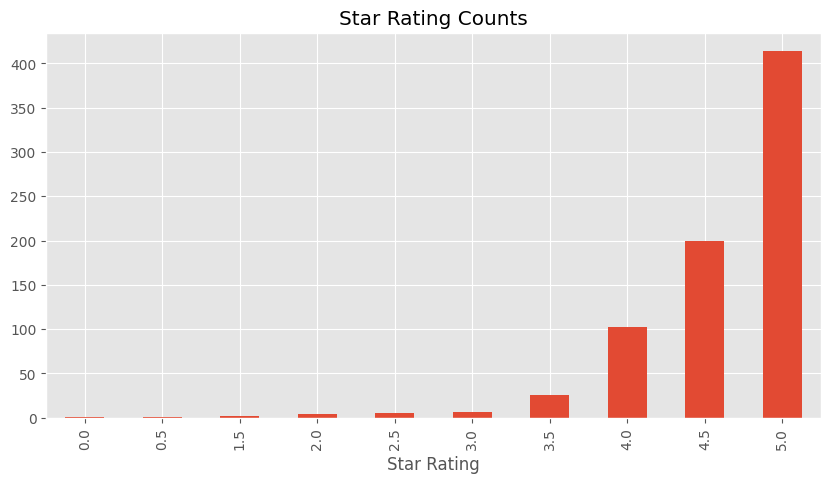

In [ ]:
df['Star Rating'].value_counts().sort_index().plot(kind="bar", title="Star Rating Counts", figsize=(10,5))

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import nltk
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [ ]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# **Using VADER (Valence Aware Dictionary and sEntiment Reasoner)**

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()
sia

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    love_comment = row["Love Comment"]
    title = row["Title"]
    myid = row["ID"]
    if pd.notna(love_comment):
        text = love_comment
    elif pd.notna(title):
        text = title
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/762 [00:00<?, ?it/s]

In [ ]:
res

{18532: {'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.886},
 67896: {'neg': 0.014, 'neu': 0.702, 'pos': 0.284, 'compound': 0.9647},
 177131: {'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'compound': 0.9477},
 179859: {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.8316},
 179888: {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.9753},
 182325: {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.8074},
 182489: {'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'compound': 0.4588},
 183103: {'neg': 0.018, 'neu': 0.717, 'pos': 0.265, 'compound': 0.973},
 183130: {'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'compound': 0.5255},
 184048: {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.2263},
 184054: {'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'compound': 0.9152},
 188630: {'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'compound': 0.9081},
 188638: {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.9217},
 190023: {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.9594},
 19947

In [ ]:
print(len(res))

762


In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
res1 = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    hate_comment = row["Hate Comment"]
    title = row["Title"]
    myid = row["ID"]
    if pd.notna(hate_comment):
        text = hate_comment
    elif pd.notna(title):
        text = title
    res1[myid] = sia.polarity_scores(text)

  0%|          | 0/762 [00:00<?, ?it/s]

In [ ]:
res1

{18532: {'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.7418},
 67896: {'neg': 0.116, 'neu': 0.848, 'pos': 0.036, 'compound': -0.432},
 177131: {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.7629},
 179859: {'neg': 0.186, 'neu': 0.814, 'pos': 0.0, 'compound': -0.6151},
 179888: {'neg': 0.052, 'neu': 0.743, 'pos': 0.206, 'compound': 0.7163},
 182325: {'neg': 0.085, 'neu': 0.69, 'pos': 0.225, 'compound': 0.8271},
 182489: {'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.5927},
 183103: {'neg': 0.104, 'neu': 0.75, 'pos': 0.146, 'compound': 0.4939},
 183130: {'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.34},
 184048: {'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'compound': 0.4767},
 184054: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 188630: {'neg': 0.044, 'neu': 0.767, 'pos': 0.189, 'compound': 0.4664},
 188638: {'neg': 0.024, 'neu': 0.832, 'pos': 0.144, 'compound': 0.8934},
 190023: {'neg': 0.271, 'neu': 0.729, 'pos': 0.0, 'compound': -0.3818},
 1994

In [ ]:
print(len(res1))

762


In [ ]:
vaders = pd.DataFrame(res).T
vaders.reset_index(inplace=True)
vaders.rename(columns={'index':'ID'}, inplace=True)
vaders

,ID,neg,neu,pos,compound
0,18532,0.000,0.863,0.137,0.8860
1,67896,0.014,0.702,0.284,0.9647
2,177131,0.000,0.621,0.379,0.9477
3,179859,0.000,0.789,0.211,0.8316
4,179888,0.000,0.648,0.352,0.9753
...,...,...,...,...,...
757,9246899,0.000,0.794,0.206,0.8555
758,9308289,0.000,0.690,0.310,0.6590
759,9460993,0.000,0.778,0.222,0.9545
760,9473115,0.000,0.944,0.056,0.1531


In [ ]:
merged_df = pd.merge(df, vaders, on='ID', how='left')
merged_df

,ID,Star Rating,Review Source,Love Comment,Hate Comment,Ease of Doing Business,Title,neg,neu,pos,compound
0,18532,4.5,Organic review. This review was written entire...,G2 has helped our customers publicly validate ...,Not a lot to dislike. Be great as G2 becomes ...,7.0,G2 helps market and customer validity,0.000,0.863,0.137,0.8860
1,67896,4.5,Invitation from G2. This reviewer was offered ...,It showcases a wide range of vendors with unbi...,There aren't enough people open to reviewing p...,6.0,Recommended for gaining visibility in B2B Mark...,0.014,0.702,0.284,0.9647
2,177131,4.5,Organic review. This review was written entire...,"Great way to build our brand in a new space, b...","So far so good, we are just starting to use ad...",7.0,Credibility,0.000,0.621,0.379,0.9477
3,179859,5.0,Organic review. This review was written entire...,The end to end service and process has been th...,There is little that I dislike. Understanding ...,7.0,Advocately have been instrumental to our revie...,0.000,0.789,0.211,0.8316
4,179888,5.0,Organic review. This review was written entire...,Advocately facilitates a continuous flow of gr...,"This is not a true dislike, but the success of...",7.0,Game Changer,0.000,0.648,0.352,0.9753
...,...,...,...,...,...,...,...,...,...,...,...
757,9246899,4.5,Invitation from G2. This reviewer was offered ...,I like how easy it has been to implement G2 Ma...,The only thing I'd like to update is the creat...,NaN,Actionable Intent Data,0.000,0.794,0.206,0.8555
758,9308289,4.5,Invitation from G2. This reviewer was offered ...,The most helpful about G2 Marketing Solution i...,When you are positioned next to American giant...,NaN,Best Analysis model to build trust,0.000,0.690,0.310,0.6590
759,9460993,5.0,Organic review. This review was written entire...,G2 Marketing Solutions is an essential tool fo...,Nothing comes to mind. I really appreciate th...,NaN,G2 is an essential tool for Procurement teams,0.000,0.778,0.222,0.9545
760,9473115,5.0,Organic review. This review was written entire...,"Everyone I speak to, thinking to Blake, Stepha...","I wouldn't mention this, except being asked to...",NaN,This company gets a 10 our of 10 for customer ...,0.000,0.944,0.056,0.1531


In [ ]:
vaders1 = pd.DataFrame(res1).T
vaders1.reset_index(inplace=True)
vaders1.rename(columns={'index':'ID'}, inplace=True)
vaders1

,ID,neg,neu,pos,compound
0,18532,0.000,0.761,0.239,0.7418
1,67896,0.116,0.848,0.036,-0.4320
2,177131,0.000,0.743,0.257,0.7629
3,179859,0.186,0.814,0.000,-0.6151
4,179888,0.052,0.743,0.206,0.7163
...,...,...,...,...,...
757,9246899,0.000,0.765,0.235,0.5574
758,9308289,0.000,1.000,0.000,0.0000
759,9460993,0.000,0.700,0.300,0.4576
760,9473115,0.088,0.912,0.000,-0.2585


In [ ]:
merged_df1 = pd.merge(df, vaders1, on='ID', how='left')
merged_df1

,ID,Star Rating,Review Source,Love Comment,Hate Comment,Ease of Doing Business,Title,neg,neu,pos,compound
0,18532,4.5,Organic review. This review was written entire...,G2 has helped our customers publicly validate ...,Not a lot to dislike. Be great as G2 becomes ...,7.0,G2 helps market and customer validity,0.000,0.761,0.239,0.7418
1,67896,4.5,Invitation from G2. This reviewer was offered ...,It showcases a wide range of vendors with unbi...,There aren't enough people open to reviewing p...,6.0,Recommended for gaining visibility in B2B Mark...,0.116,0.848,0.036,-0.4320
2,177131,4.5,Organic review. This review was written entire...,"Great way to build our brand in a new space, b...","So far so good, we are just starting to use ad...",7.0,Credibility,0.000,0.743,0.257,0.7629
3,179859,5.0,Organic review. This review was written entire...,The end to end service and process has been th...,There is little that I dislike. Understanding ...,7.0,Advocately have been instrumental to our revie...,0.186,0.814,0.000,-0.6151
4,179888,5.0,Organic review. This review was written entire...,Advocately facilitates a continuous flow of gr...,"This is not a true dislike, but the success of...",7.0,Game Changer,0.052,0.743,0.206,0.7163
...,...,...,...,...,...,...,...,...,...,...,...
757,9246899,4.5,Invitation from G2. This reviewer was offered ...,I like how easy it has been to implement G2 Ma...,The only thing I'd like to update is the creat...,NaN,Actionable Intent Data,0.000,0.765,0.235,0.5574
758,9308289,4.5,Invitation from G2. This reviewer was offered ...,The most helpful about G2 Marketing Solution i...,When you are positioned next to American giant...,NaN,Best Analysis model to build trust,0.000,1.000,0.000,0.0000
759,9460993,5.0,Organic review. This review was written entire...,G2 Marketing Solutions is an essential tool fo...,Nothing comes to mind. I really appreciate th...,NaN,G2 is an essential tool for Procurement teams,0.000,0.700,0.300,0.4576
760,9473115,5.0,Organic review. This review was written entire...,"Everyone I speak to, thinking to Blake, Stepha...","I wouldn't mention this, except being asked to...",NaN,This company gets a 10 our of 10 for customer ...,0.088,0.912,0.000,-0.2585


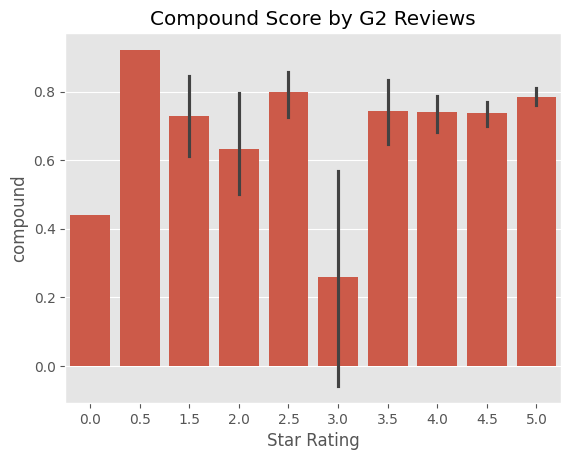

In [ ]:
ax = sns.barplot(data=merged_df, x="Star Rating", y="compound")
ax.set_title("Compound Score by G2 Reviews")
plt.show()

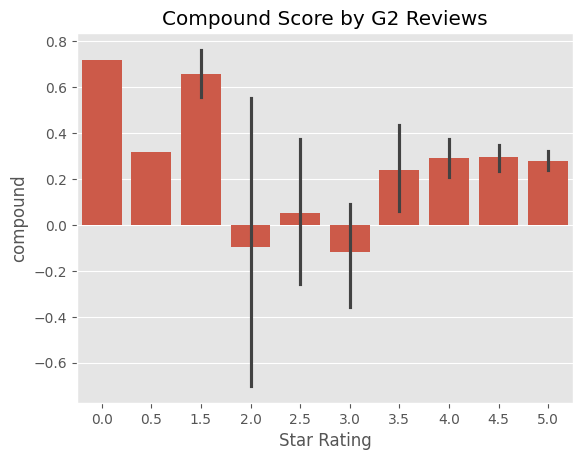

In [ ]:
ax1 = sns.barplot(data=merged_df1, x="Star Rating", y="compound")
ax1.set_title("Compound Score by G2 Reviews")
plt.show()

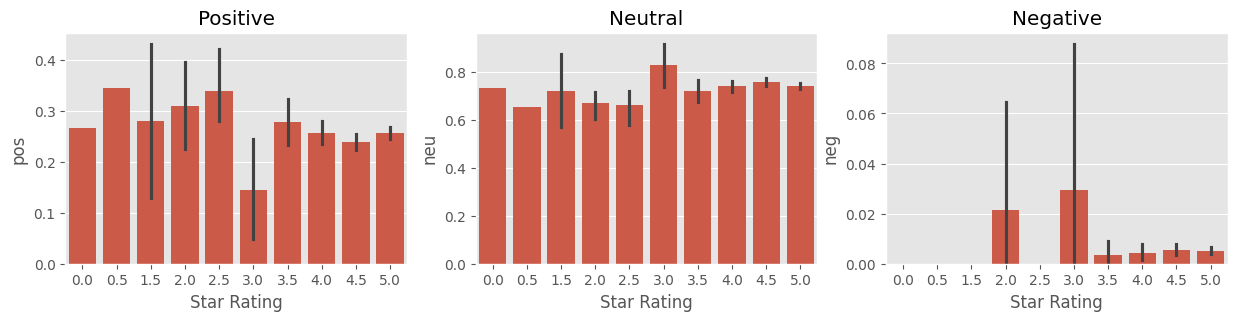

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,3))
sns.barplot(data=merged_df, x="Star Rating", y="pos", ax=axs[0])
sns.barplot(data=merged_df, x="Star Rating", y="neu", ax=axs[1])
sns.barplot(data=merged_df, x="Star Rating", y="neg", ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
plt.show()

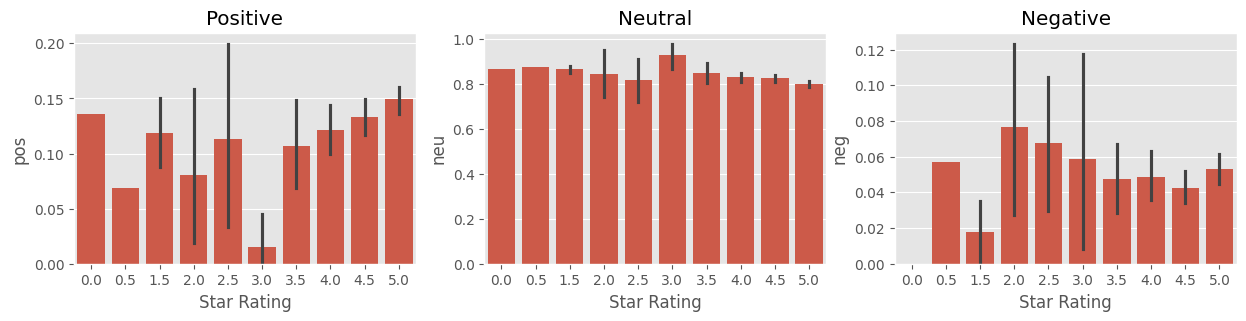

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,3))
sns.barplot(data=merged_df1, x="Star Rating", y="pos", ax=axs[0])
sns.barplot(data=merged_df1, x="Star Rating", y="neu", ax=axs[1])
sns.barplot(data=merged_df1, x="Star Rating", y="neg", ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
plt.show()

## **RoBERTa (Robustly optimized BERT approach) Pretrained Model**

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def polarity_score_roberta(example):
  encoded_text = tokenizer(example, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
    'Roberta Negative' : scores[0],
    'Roberta Neutral' : scores[1],
    'Roberta Positive' : scores[2]
  }
  return scores_dict

In [ ]:
print(len(merged_df))

762


In [ ]:
res_love = {}
for i, row in tqdm(merged_df.iterrows(), total=len(merged_df)):
    try:
        love_comment = row["Love Comment"]
        title = row["Title"]
        myid = row["ID"]
        if pd.notna(love_comment):
          text = love_comment
        elif pd.notna(title):
          text = title
        if isinstance(text, str):
            myid = row["ID"]
            vader_result = sia.polarity_scores(text)
            vader_result_rename = {}
            for key, value in vader_result.items():
                vader_result_rename[f"vader_{key}"] = value
            roberta_result = polarity_score_roberta(text)
            both = {**vader_result_rename, **roberta_result}
            res_love[myid] = both
    except RuntimeError:
        print(f"Broke for ID: {myid}")

  0%|          | 0/762 [00:00<?, ?it/s]

In [ ]:
res_love

{18532: {'vader_neg': 0.0,
  'vader_neu': 0.863,
  'vader_pos': 0.137,
  'vader_compound': 0.886,
  'Roberta Negative': 0.010439055,
  'Roberta Neutral': 0.18600485,
  'Roberta Positive': 0.8035561},
 67896: {'vader_neg': 0.014,
  'vader_neu': 0.702,
  'vader_pos': 0.284,
  'vader_compound': 0.9647,
  'Roberta Negative': 0.006044993,
  'Roberta Neutral': 0.13032663,
  'Roberta Positive': 0.8636284},
 177131: {'vader_neg': 0.0,
  'vader_neu': 0.621,
  'vader_pos': 0.379,
  'vader_compound': 0.9477,
  'Roberta Negative': 0.0028601524,
  'Roberta Neutral': 0.02166136,
  'Roberta Positive': 0.97547853},
 179859: {'vader_neg': 0.0,
  'vader_neu': 0.789,
  'vader_pos': 0.211,
  'vader_compound': 0.8316,
  'Roberta Negative': 0.0054242727,
  'Roberta Neutral': 0.035134193,
  'Roberta Positive': 0.9594415},
 179888: {'vader_neg': 0.0,
  'vader_neu': 0.648,
  'vader_pos': 0.352,
  'vader_compound': 0.9753,
  'Roberta Negative': 0.004068805,
  'Roberta Neutral': 0.026647994,
  'Roberta Positive'

In [ ]:
print(len(res_love))

762


In [ ]:
res_hate = {}
for i, row in tqdm(merged_df1.iterrows(), total=len(merged_df1)):
    try:
        hate_comment = row["Hate Comment"]
        title = row["Title"]
        myid = row["ID"]
        if pd.notna(hate_comment):
          text = hate_comment
        elif pd.notna(title):
          text = title
        if isinstance(text, str):
            myid = row["ID"]
            vader_result = sia.polarity_scores(text)
            vader_result_rename = {}
            for key, value in vader_result.items():
                vader_result_rename[f"vader_{key}"] = value
            roberta_result = polarity_score_roberta(text)
            both = {**vader_result_rename, **roberta_result}
            res_hate[myid] = both
    except RuntimeError:
        print(f"Broke for ID: {myid}")

  0%|          | 0/762 [00:00<?, ?it/s]

In [ ]:
print(len(res_hate))

762


In [ ]:
res_hate

{18532: {'vader_neg': 0.0,
  'vader_neu': 0.761,
  'vader_pos': 0.239,
  'vader_compound': 0.7418,
  'Roberta Negative': 0.012751959,
  'Roberta Neutral': 0.08537302,
  'Roberta Positive': 0.90187496},
 67896: {'vader_neg': 0.116,
  'vader_neu': 0.848,
  'vader_pos': 0.036,
  'vader_compound': -0.432,
  'Roberta Negative': 0.32614005,
  'Roberta Neutral': 0.6169936,
  'Roberta Positive': 0.05686635},
 177131: {'vader_neg': 0.0,
  'vader_neu': 0.743,
  'vader_pos': 0.257,
  'vader_compound': 0.7629,
  'Roberta Negative': 0.005826515,
  'Roberta Neutral': 0.07356273,
  'Roberta Positive': 0.9206108},
 179859: {'vader_neg': 0.186,
  'vader_neu': 0.814,
  'vader_pos': 0.0,
  'vader_compound': -0.6151,
  'Roberta Negative': 0.3746364,
  'Roberta Neutral': 0.5189407,
  'Roberta Positive': 0.10642297},
 179888: {'vader_neg': 0.052,
  'vader_neu': 0.743,
  'vader_pos': 0.206,
  'vader_compound': 0.7163,
  'Roberta Negative': 0.04484581,
  'Roberta Neutral': 0.43407434,
  'Roberta Positive': 0.

In [ ]:
results_df = pd.DataFrame(res_love).T

In [ ]:
results_df

,vader_neg,vader_neu,vader_pos,vader_compound,Roberta Negative,Roberta Neutral,Roberta Positive
18532,0.000,0.863,0.137,0.8860,0.010439,0.186005,0.803556
67896,0.014,0.702,0.284,0.9647,0.006045,0.130327,0.863628
177131,0.000,0.621,0.379,0.9477,0.002860,0.021661,0.975479
179859,0.000,0.789,0.211,0.8316,0.005424,0.035134,0.959441
179888,0.000,0.648,0.352,0.9753,0.004069,0.026648,0.969283
...,...,...,...,...,...,...,...
9246899,0.000,0.794,0.206,0.8555,0.005097,0.046424,0.948479
9308289,0.000,0.690,0.310,0.6590,0.005279,0.054775,0.939946
9460993,0.000,0.778,0.222,0.9545,0.007948,0.194479,0.797573
9473115,0.000,0.944,0.056,0.1531,0.014168,0.258592,0.727240


In [ ]:
merged_df = results_df.merge(df, left_index=True, right_on='ID', how='left')
merged_df.drop(columns=['Hate Comment'], inplace=True)

In [ ]:
merged_df.head()

,vader_neg,vader_neu,vader_pos,vader_compound,Roberta Negative,Roberta Neutral,Roberta Positive,ID,Star Rating,Review Source,Love Comment,Ease of Doing Business,Title
0,0.000,0.863,0.137,0.8860,0.010439,0.186005,0.803556,18532,4.5,Organic review. This review was written entire...,G2 has helped our customers publicly validate ...,7.0,G2 helps market and customer validity
1,0.014,0.702,0.284,0.9647,0.006045,0.130327,0.863628,67896,4.5,Invitation from G2. This reviewer was offered ...,It showcases a wide range of vendors with unbi...,6.0,Recommended for gaining visibility in B2B Mark...
2,0.000,0.621,0.379,0.9477,0.002860,0.021661,0.975479,177131,4.5,Organic review. This review was written entire...,"Great way to build our brand in a new space, b...",7.0,Credibility
3,0.000,0.789,0.211,0.8316,0.005424,0.035134,0.959441,179859,5.0,Organic review. This review was written entire...,The end to end service and process has been th...,7.0,Advocately have been instrumental to our revie...
4,0.000,0.648,0.352,0.9753,0.004069,0.026648,0.969283,179888,5.0,Organic review. This review was written entire...,Advocately facilitates a continuous flow of gr...,7.0,Game Changer


In [ ]:
results_df1 = pd.DataFrame(res_hate).T
results_df1

,vader_neg,vader_neu,vader_pos,vader_compound,Roberta Negative,Roberta Neutral,Roberta Positive
18532,0.000,0.761,0.239,0.7418,0.012752,0.085373,0.901875
67896,0.116,0.848,0.036,-0.4320,0.326140,0.616994,0.056866
177131,0.000,0.743,0.257,0.7629,0.005827,0.073563,0.920611
179859,0.186,0.814,0.000,-0.6151,0.374636,0.518941,0.106423
179888,0.052,0.743,0.206,0.7163,0.044846,0.434074,0.521080
...,...,...,...,...,...,...,...
9246899,0.000,0.765,0.235,0.5574,0.028313,0.877471,0.094216
9308289,0.000,1.000,0.000,0.0000,0.377091,0.583532,0.039376
9460993,0.000,0.700,0.300,0.4576,0.009642,0.030589,0.959768
9473115,0.088,0.912,0.000,-0.2585,0.591644,0.387287,0.021069


In [ ]:
merged_df1 = results_df1.merge(df, left_index=True, right_on='ID', how='left')
merged_df1.drop(columns=['Love Comment'], inplace=True)
merged_df1.head()

,vader_neg,vader_neu,vader_pos,vader_compound,Roberta Negative,Roberta Neutral,Roberta Positive,ID,Star Rating,Review Source,Hate Comment,Ease of Doing Business,Title
0,0.000,0.761,0.239,0.7418,0.012752,0.085373,0.901875,18532,4.5,Organic review. This review was written entire...,Not a lot to dislike. Be great as G2 becomes ...,7.0,G2 helps market and customer validity
1,0.116,0.848,0.036,-0.4320,0.326140,0.616994,0.056866,67896,4.5,Invitation from G2. This reviewer was offered ...,There aren't enough people open to reviewing p...,6.0,Recommended for gaining visibility in B2B Mark...
2,0.000,0.743,0.257,0.7629,0.005827,0.073563,0.920611,177131,4.5,Organic review. This review was written entire...,"So far so good, we are just starting to use ad...",7.0,Credibility
3,0.186,0.814,0.000,-0.6151,0.374636,0.518941,0.106423,179859,5.0,Organic review. This review was written entire...,There is little that I dislike. Understanding ...,7.0,Advocately have been instrumental to our revie...
4,0.052,0.743,0.206,0.7163,0.044846,0.434074,0.521080,179888,5.0,Organic review. This review was written entire...,"This is not a true dislike, but the success of...",7.0,Game Changer


In [ ]:
merged_df.columns

Index(['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'Roberta Negative', 'Roberta Neutral', 'Roberta Positive', 'ID',
       'Star Rating', 'Review Source', 'Love Comment',
       'Ease of Doing Business', 'Title'],
      dtype='object')

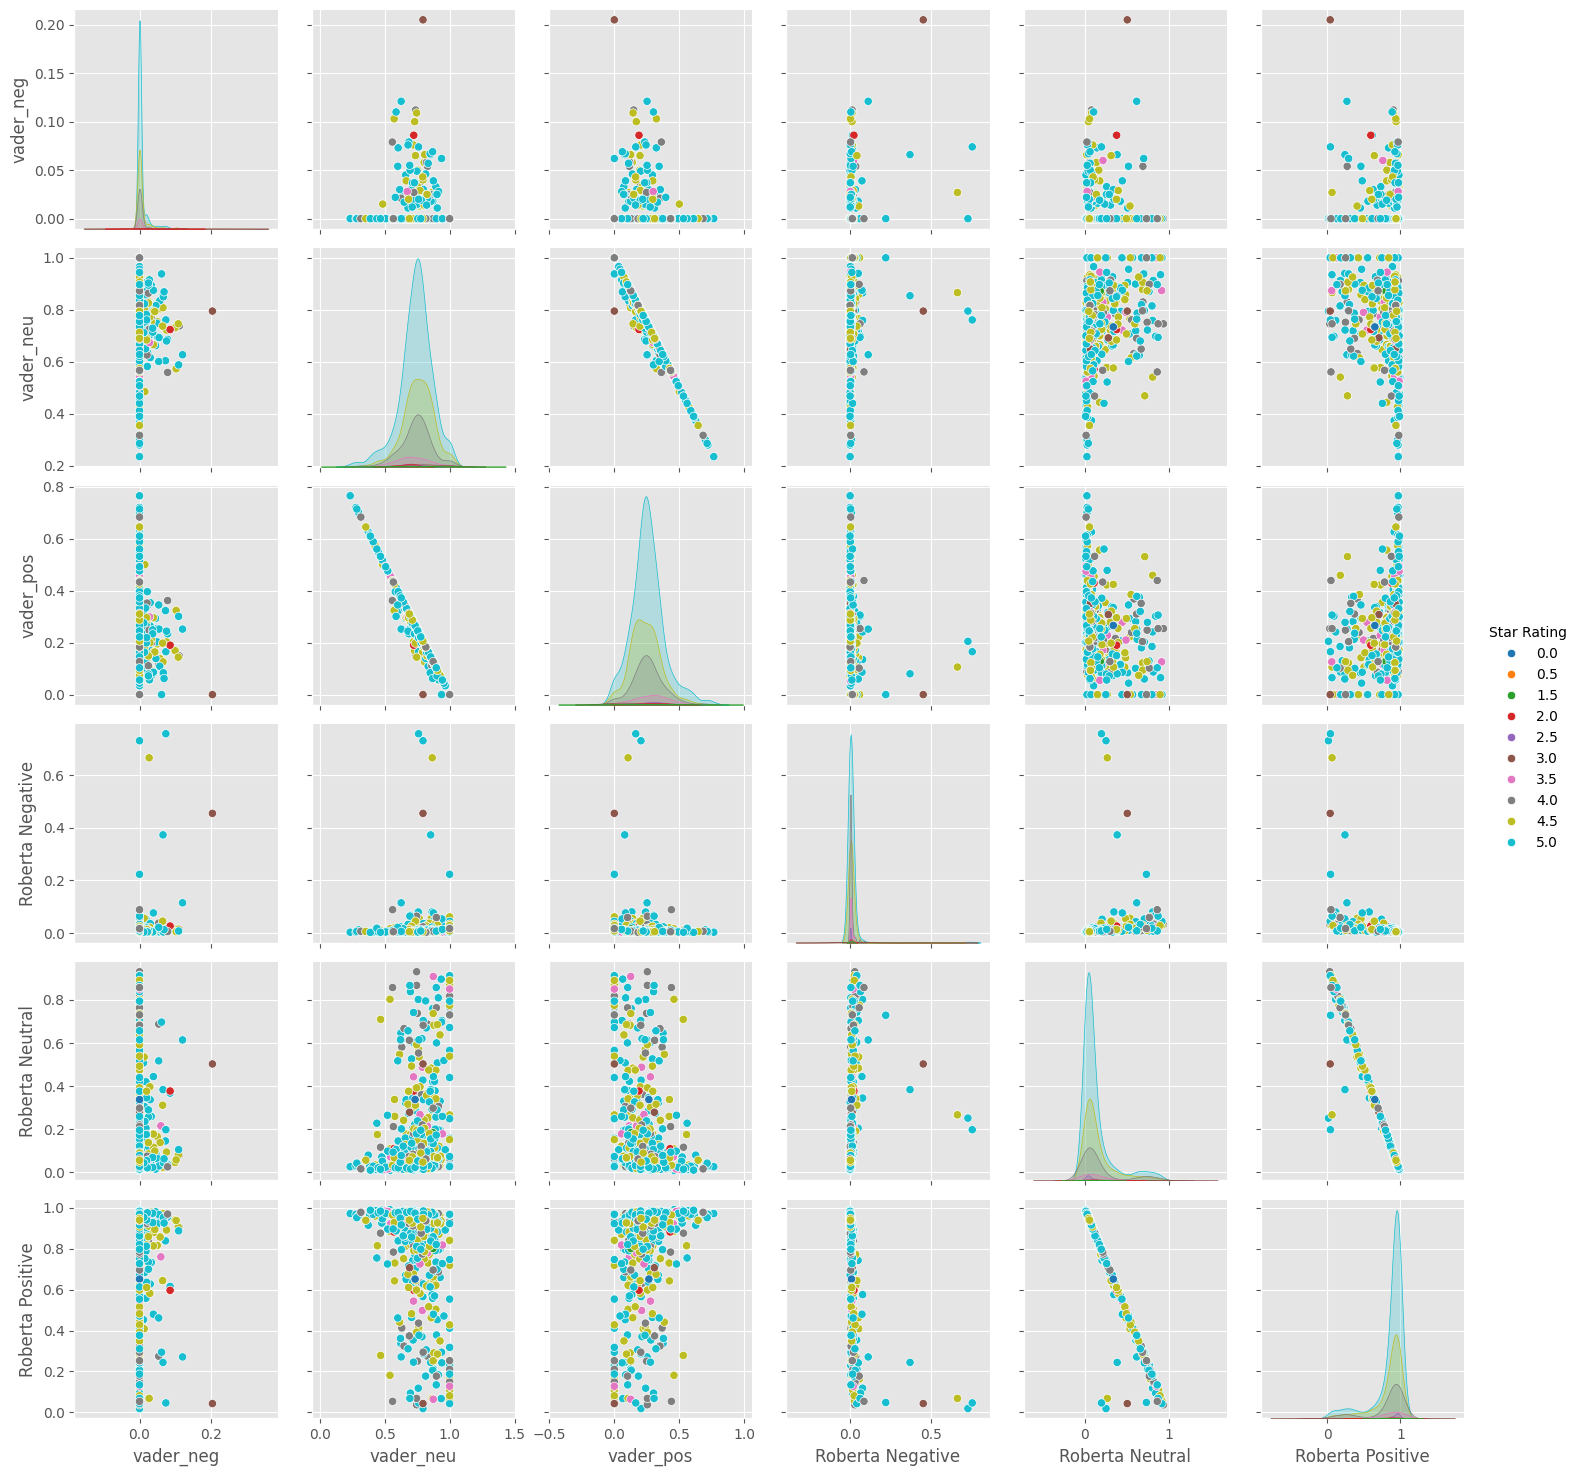

In [ ]:
sns.pairplot(data=merged_df, vars=['vader_neg','vader_neu','vader_pos','Roberta Negative','Roberta Neutral','Roberta Positive'],
             hue = 'Star Rating',
             palette = 'tab10')
plt.show()

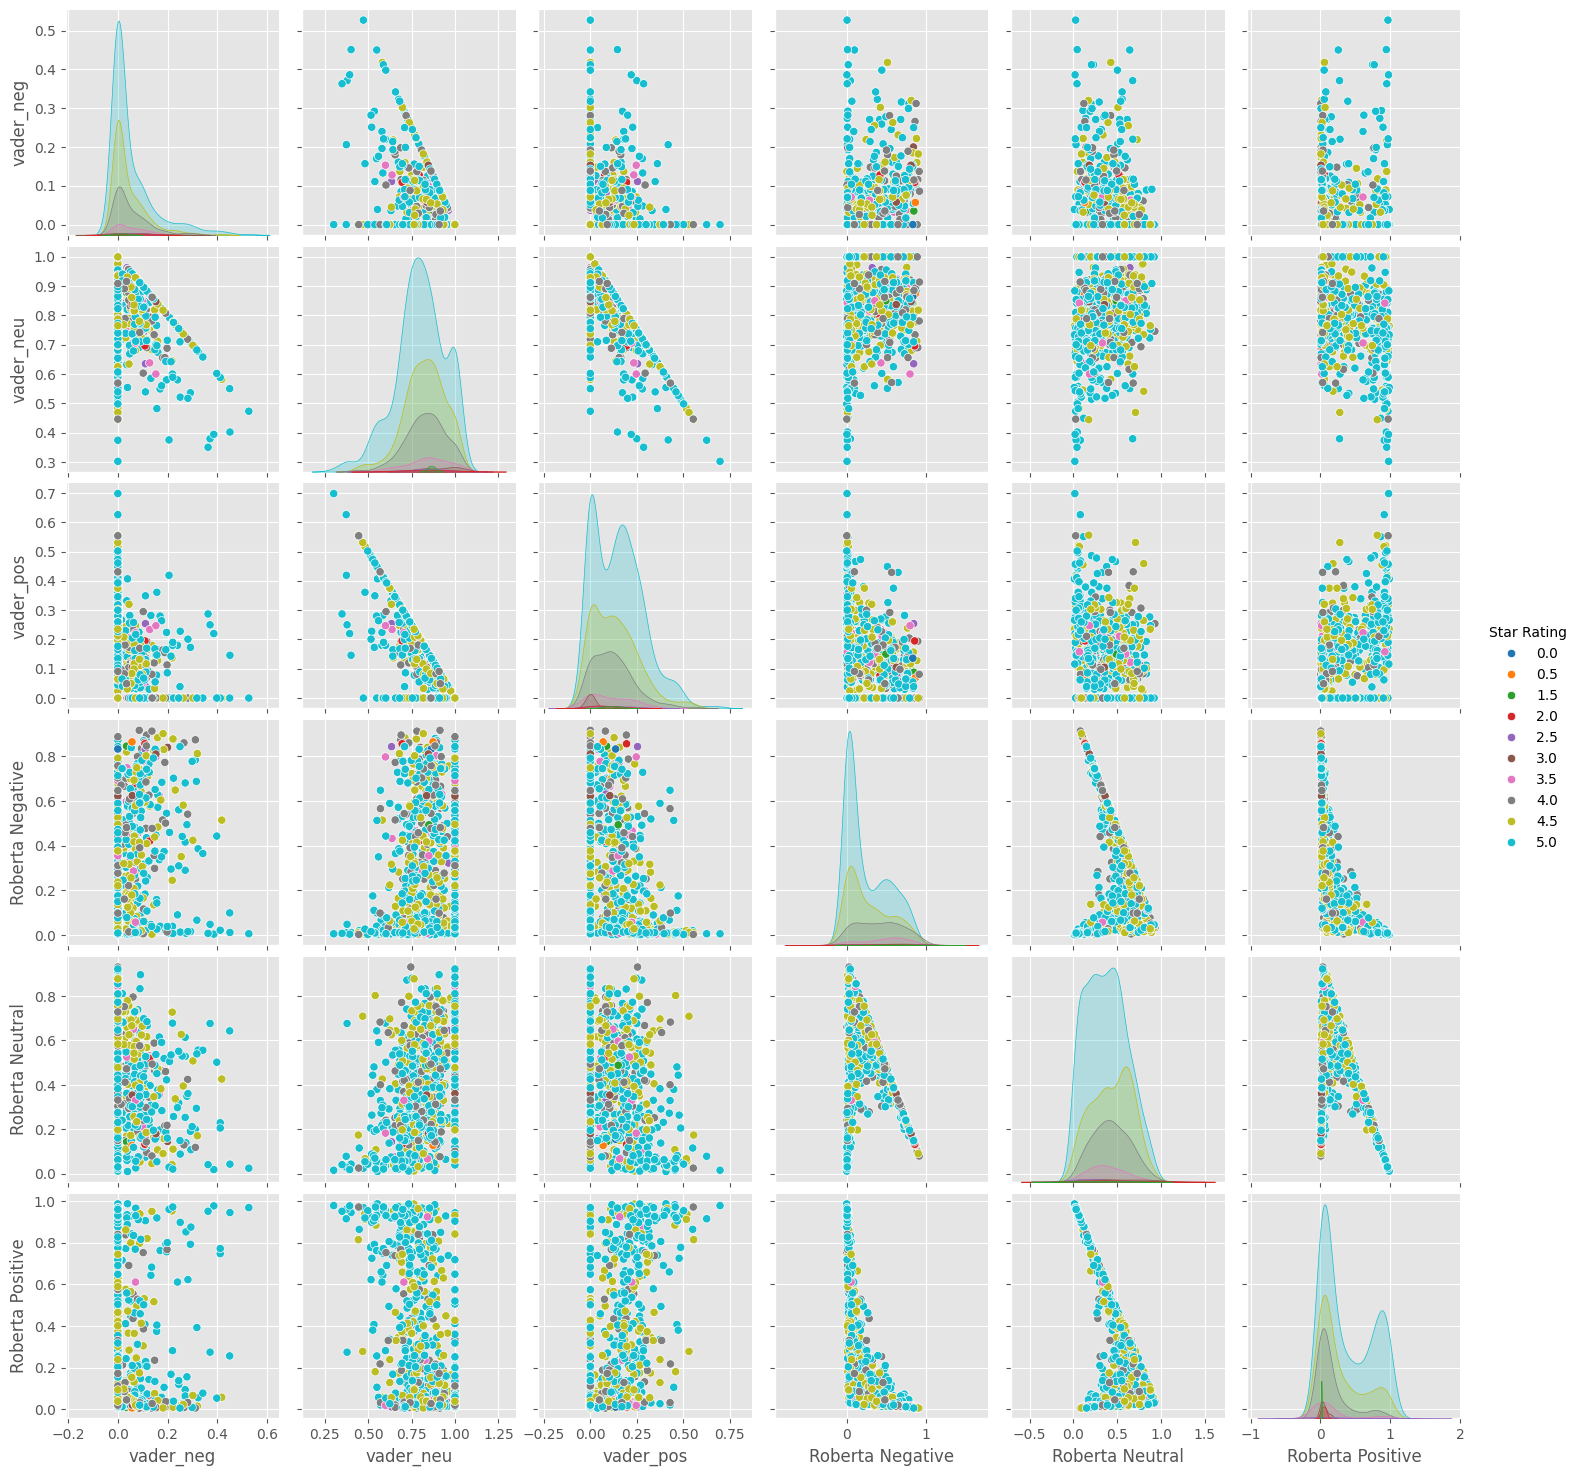

In [ ]:
sns.pairplot(data=merged_df1, vars=['vader_neg','vader_neu','vader_pos','Roberta Negative','Roberta Neutral','Roberta Positive'],
             hue = 'Star Rating',
             palette = 'tab10')
plt.show()

## **MOST LIKED FEATURES BY THE CUSTOMERS**

In [ ]:
# Sort the DataFrame based on the compound score in descending order
sorted_results = merged_df.sort_values(by='Roberta Positive', ascending=False)

# Extract the top 10 love comments
top_love_comments = sorted_results['Love Comment'].head(10)

# Print the top 10 love comments as "liked features"
print("Top 10 Liked Features:")
for idx, comment in enumerate(top_love_comments, start=1):
    print(f"{idx}. {comment}")

Top 10 Liked Features:
1. Our CSM, Jeremy, is so dedicated and excited - it's rejuvenating!
2. I really like that you can promote your company, our offers, and the support. Wow! Amazing! Answers all our questions super fast! :)
3. G2 team's enthusiasm and support were amazing, it helped us to be on top 10! The Amazon Voucher campaign was a great idea!
4. I am fortunate to work with such a fantastic team. The features we were offered are excellent and new innovations are always coming out. I strongly believe that this is due to the hard-working team at G2, of which I can single out the amazing Abhilash Chowdhury and Matthieu Le Sayec.
5. -Reading feedback from customers has been amazing!  We've been encouraged by how much people love Bonusly, and the reviews have had great ideas.

-Also, our onboarding specialist Anna was helpful, friendly, flexible, and responsive. I always had the information I needed and we got off to a great start. 
6. This site is really great - we are getting a lo

# **FEATURES CUSTOMERS WOULD LIKE IMPROVEMENTS IN / CUSTOMERS' ASKS**

In [ ]:
# Sort the DataFrame based on the compound score in descending order
sorted_results1 = merged_df1.sort_values(by='Roberta Negative', ascending=False)

# Extract the top 10 love comments
top_hate_comments = sorted_results1['Hate Comment'].head(10)

# Print the top 10 love comments as "liked features"
print("Customers' Asks:")
for idx, comment in enumerate(top_hate_comments, start=1):
    print(f"{idx}. {comment}")

Customers' Asks:
1. Extremely clumsy product ranking system for non-review metrics. Half of the data is incorrect, and half of the data is out of date. Requests to update do nothing. It seems that most specialists do not understand how it works.
An extremely annoying robot assistant in the vendor's account pops up every time even though I forbid it every time.
2. Our issues aren't being resolved as quickly as we would like. The admin panel comes with bugs and problems that sometimes remain there for months at a time.
3. The moderation process is almost too in-depth... I find that sometimes verified reviews are rejected. The process is also lengthy and can be overall annoying compared to other review sites.
4. I dislike the frequency and large amounts of reports they offer. I think it dilutes their validity for prospects and sales.  I also dislike how short their reviews are. I don't think a reviewer is encouraged enough to leave longer more helpful reviews that give better insight into

Now, we further improve this by preprocessing the data to train an LLM.

In [ ]:
# Merge results_df1 with df
merged_df1 = results_df1.merge(df, left_index=True, right_on='ID', how='left')

# Drop the "Love Comment" column
merged_df1.drop(columns=['Love Comment'], inplace=True)
merged_df1.drop(columns=['vader_neg'], inplace=True)
merged_df1.drop(columns=['vader_pos'], inplace=True)
merged_df1.drop(columns=['vader_neu'], inplace=True)
# merged_df1.drop(columns=['Roberta Negative'], inplace=True)
# merged_df1.drop(columns=['Roberta Neutral'], inplace=True)

# Rename the "Hate Comment" column to "Comment"
merged_df1.rename(columns={'Hate Comment': 'Comment'}, inplace=True)

# Display the first few rows of the DataFrame
merged_df1.head()

,vader_compound,Roberta Negative,Roberta Neutral,Roberta Positive,ID,Star Rating,Review Source,Comment,Ease of Doing Business,Title
0,0.7418,0.012752,0.085373,0.901875,18532,4.5,Organic review. This review was written entire...,Not a lot to dislike. Be great as G2 becomes ...,7.0,G2 helps market and customer validity
1,-0.4320,0.326140,0.616994,0.056866,67896,4.5,Invitation from G2. This reviewer was offered ...,There aren't enough people open to reviewing p...,6.0,Recommended for gaining visibility in B2B Mark...
2,0.7629,0.005827,0.073563,0.920611,177131,4.5,Organic review. This review was written entire...,"So far so good, we are just starting to use ad...",7.0,Credibility
3,-0.6151,0.374636,0.518941,0.106423,179859,5.0,Organic review. This review was written entire...,There is little that I dislike. Understanding ...,7.0,Advocately have been instrumental to our revie...
4,0.7163,0.044846,0.434074,0.521080,179888,5.0,Organic review. This review was written entire...,"This is not a true dislike, but the success of...",7.0,Game Changer


In [ ]:
# Merge results_df1 with df
merged_df = results_df.merge(df, left_index=True, right_on='ID', how='left')

# Drop the "Love Comment" column
merged_df.drop(columns=['Hate Comment'], inplace=True)
merged_df.drop(columns=['vader_neg'], inplace=True)
merged_df.drop(columns=['vader_pos'], inplace=True)
merged_df.drop(columns=['vader_neu'], inplace=True)
# merged_df.drop(columns=['Roberta Negative'], inplace=True)
# merged_df.drop(columns=['Roberta Neutral'], inplace=True)
# Rename the "Hate Comment" column to "Comment"
merged_df.rename(columns={'Love Comment': 'Comment'}, inplace=True)

# Display the first few rows of the DataFrame
merged_df.head()

,vader_compound,Roberta Negative,Roberta Neutral,Roberta Positive,ID,Star Rating,Review Source,Comment,Ease of Doing Business,Title
0,0.8860,0.010439,0.186005,0.803556,18532,4.5,Organic review. This review was written entire...,G2 has helped our customers publicly validate ...,7.0,G2 helps market and customer validity
1,0.9647,0.006045,0.130327,0.863628,67896,4.5,Invitation from G2. This reviewer was offered ...,It showcases a wide range of vendors with unbi...,6.0,Recommended for gaining visibility in B2B Mark...
2,0.9477,0.002860,0.021661,0.975479,177131,4.5,Organic review. This review was written entire...,"Great way to build our brand in a new space, b...",7.0,Credibility
3,0.8316,0.005424,0.035134,0.959441,179859,5.0,Organic review. This review was written entire...,The end to end service and process has been th...,7.0,Advocately have been instrumental to our revie...
4,0.9753,0.004069,0.026648,0.969283,179888,5.0,Organic review. This review was written entire...,Advocately facilitates a continuous flow of gr...,7.0,Game Changer


In [ ]:
# Concatenate the two DataFrames vertically
final_df = pd.concat([merged_df, merged_df1], ignore_index=True)

# Sort the DataFrame based on the "Roberta Positive" column
final_df = final_df.sort_values(by='Roberta Positive', ascending=False)

# Reset the index
final_df.reset_index(drop=True, inplace=True)
final_df

,vader_compound,Roberta Negative,Roberta Neutral,Roberta Positive,ID,Star Rating,Review Source,Comment,Ease of Doing Business,Title
0,0.7797,0.002041,0.007150,0.990809,4652717,5.0,Invitation from G2. This reviewer was offered ...,"Our CSM, Jeremy, is so dedicated and excited -...",NaN,Wonderful experience
1,0.9734,0.002603,0.009084,0.988313,7274157,5.0,G2 Gives Campaign. This reviewer was offered a...,I really like that you can promote your compan...,NaN,"Amazing product and support, G2 is crucial for..."
2,0.9484,0.003116,0.008731,0.988154,4168233,5.0,Invitation from a seller or affiliate. This re...,"G2 team's enthusiasm and support were amazing,...",NaN,Great onboarding process
3,0.9359,0.003086,0.010026,0.986888,4262009,5.0,Invitation from a seller or affiliate. This re...,"Nothing, at the moment! The user-friendly plat...",7.0,No smoke and mirrors
4,0.9442,0.003328,0.009923,0.986749,7059389,5.0,G2 Gives Campaign. This reviewer was offered a...,I am fortunate to work with such a fantastic t...,NaN,"Amazing services and support, highly recommend..."
...,...,...,...,...,...,...,...,...,...,...
1519,-0.8934,0.843799,0.149300,0.006901,9171749,5.0,Invitation from G2. This reviewer was offered ...,it was unfortunate that we had guite a bit of ...,7.0,"A true partnership, supporting our P2P journey"
1520,-0.7717,0.874423,0.118685,0.006892,4652662,4.0,Invitation from G2. This reviewer was offered ...,our organization's inability to set up the SFD...,NaN,Great technology and team
1521,-0.1823,0.913399,0.079945,0.006656,7208357,4.0,G2 Gives Campaign. This reviewer was offered a...,Our issues aren't being resolved as quickly as...,NaN,A great way to generate user feedback
1522,-0.6478,0.916951,0.076749,0.006300,7119054,4.0,G2 Gives Campaign. This reviewer was offered a...,Extremely clumsy product ranking system for no...,NaN,"Great people, imperfect system"


In [ ]:
# Count the occurrences of each ID
id_counts = final_df['ID'].value_counts()

# Display the count of occurrences for each ID
print(id_counts)

ID
4652717    2
555826     2
2280568    2
341360     2
4658868    2
          ..
753884     2
2788151    2
646011     2
519906     2
336671     2
Name: count, Length: 762, dtype: int64


In [ ]:
# Number of rows in the initial DataFrame
initial_rows = df.shape[0]

# Number of rows in the final DataFrame
final_rows = final_df.shape[0]

print("Number of rows in the initial DataFrame:", initial_rows)
print("Number of rows in the final DataFrame:", final_rows)

Number of rows in the initial DataFrame: 762
Number of rows in the final DataFrame: 1524


In [ ]:
final_df.to_csv('final.csv', index=False)